# 1. Load and Explore Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv("loan-train.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_val = pd.read_csv("loan-test.csv")
df_val.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# 2. Cek Validitas Data

## 2.1. Pemeriksaan dan penggantian null.

Bila terdapat data yang null maka akan diisi dengan suatu nilai. Nilai pengisinya bisa didapatkan dari penghitungan rata-rata (mean), atau dari penghitungan modusnya (mode).

In [ ]:
import missingno as msno

df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_val.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

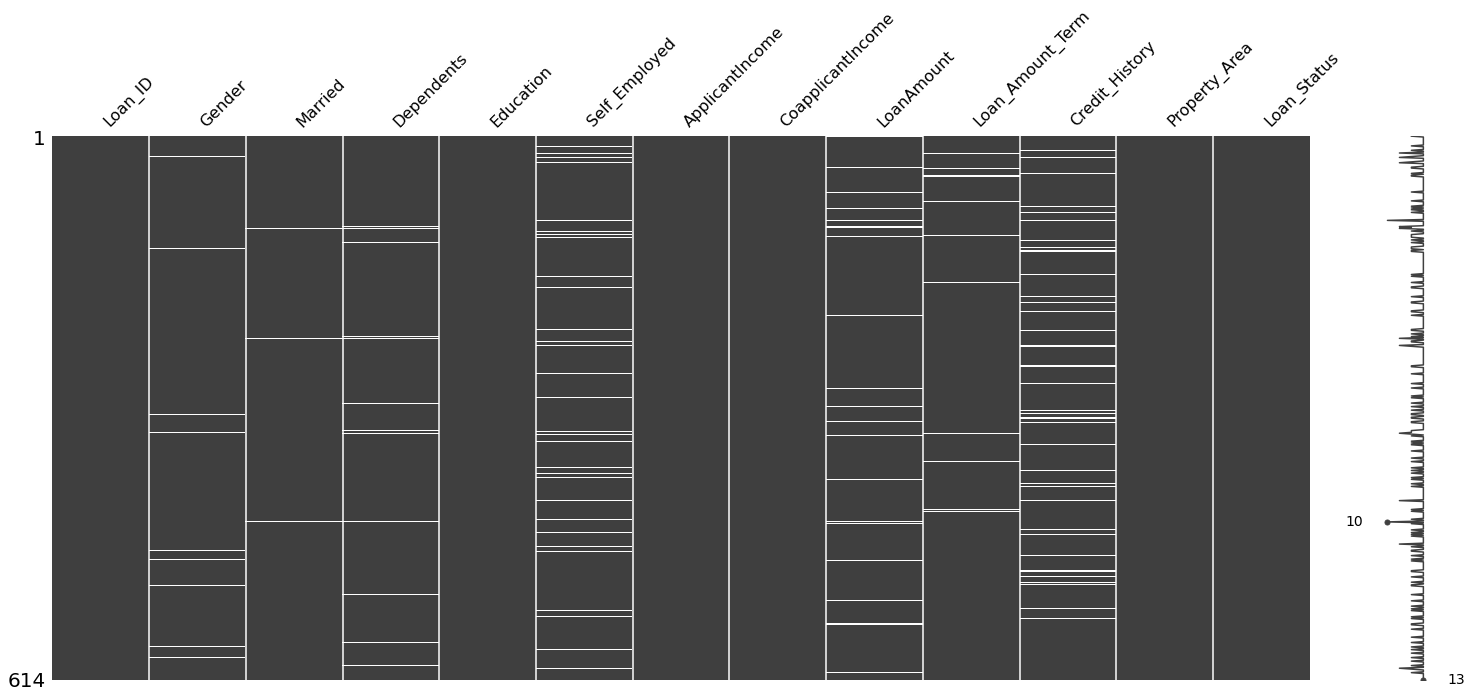

In [ ]:
msno.matrix(df_train)

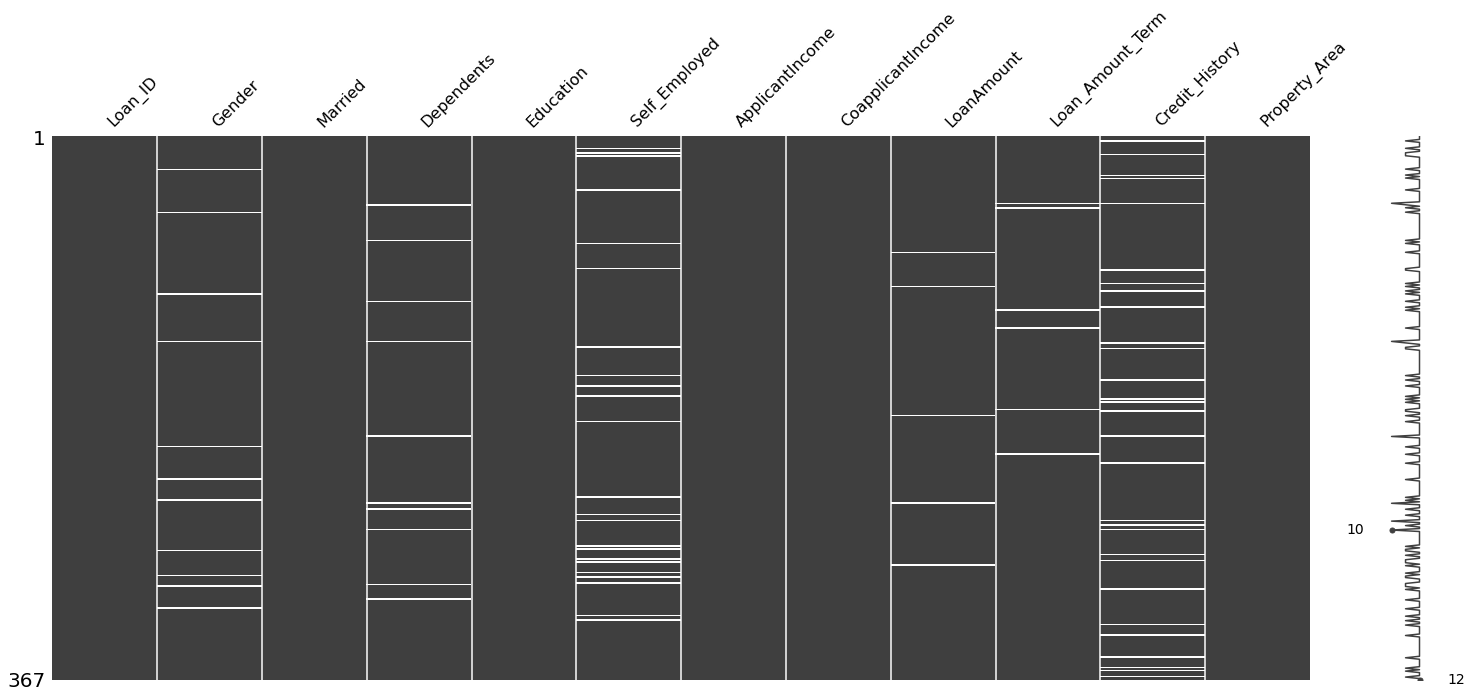

In [ ]:
msno.matrix(df_val)

In [ ]:
# Gantikan nilai null di semua fitur atau variabel yang memiliki nilai null.
# Untuk fitur numerikal dipakai fungsi mean() untuk mengisi nilai null dengan nilai rata-rata.
# Untuk fitur kategorikal dipakai fungsi mode() untuk mengisi nilai null dengan nilai terbanyak / modus.

df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_val['Gender'].fillna(df_val['Gender'].mode()[0], inplace=True)

df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
#df_val['Married'].fillna(df_val['Married'].mode()[0], inplace=True)

df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_val['Dependents'].fillna(df_val['Dependents'].mode()[0], inplace=True)

df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_val['Self_Employed'].fillna(df_val['Self_Employed'].mode()[0], inplace=True)

df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_val['LoanAmount'].fillna(df_val['LoanAmount'].mean(), inplace=True)

df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace=True)
df_val['Loan_Amount_Term'].fillna(df_val['Loan_Amount_Term'].mean(), inplace=True)

df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_val['Credit_History'].fillna(df_val['Credit_History'].mode()[0], inplace=True)

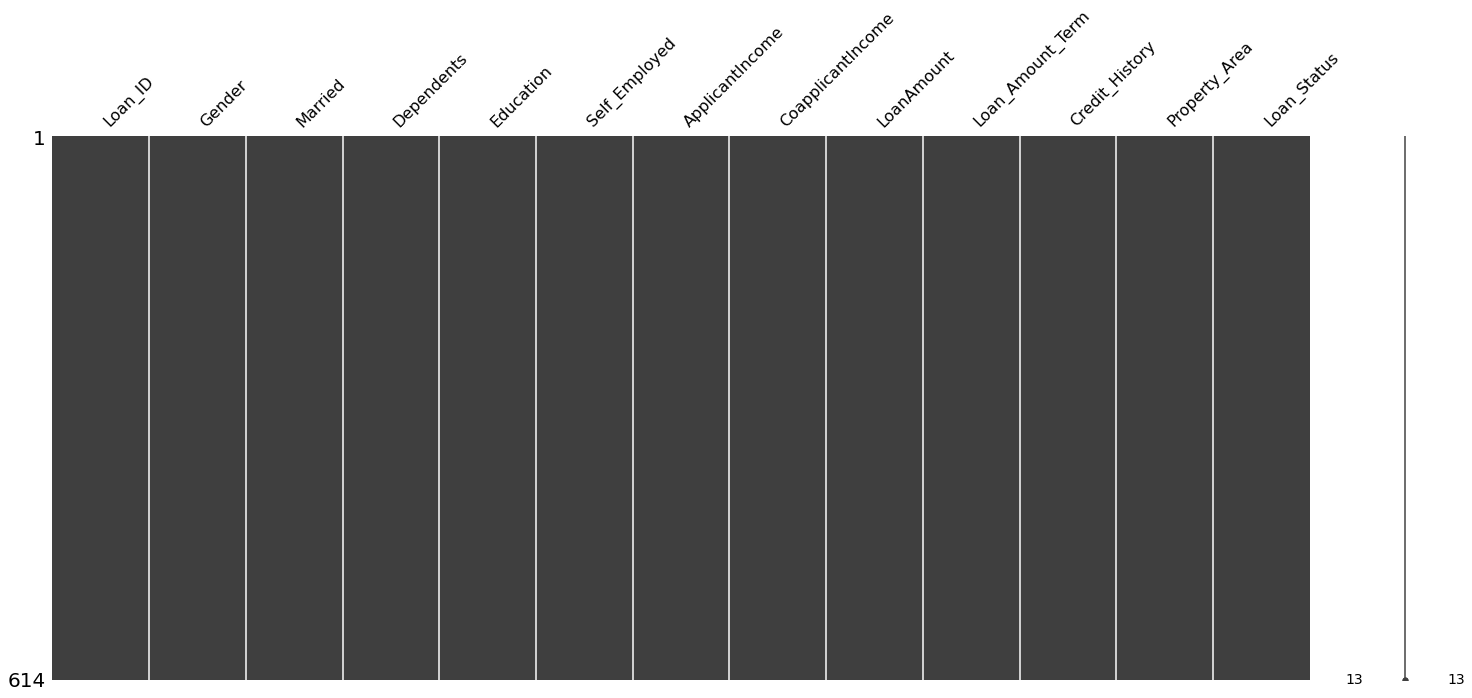

In [ ]:
msno.matrix(df_train)

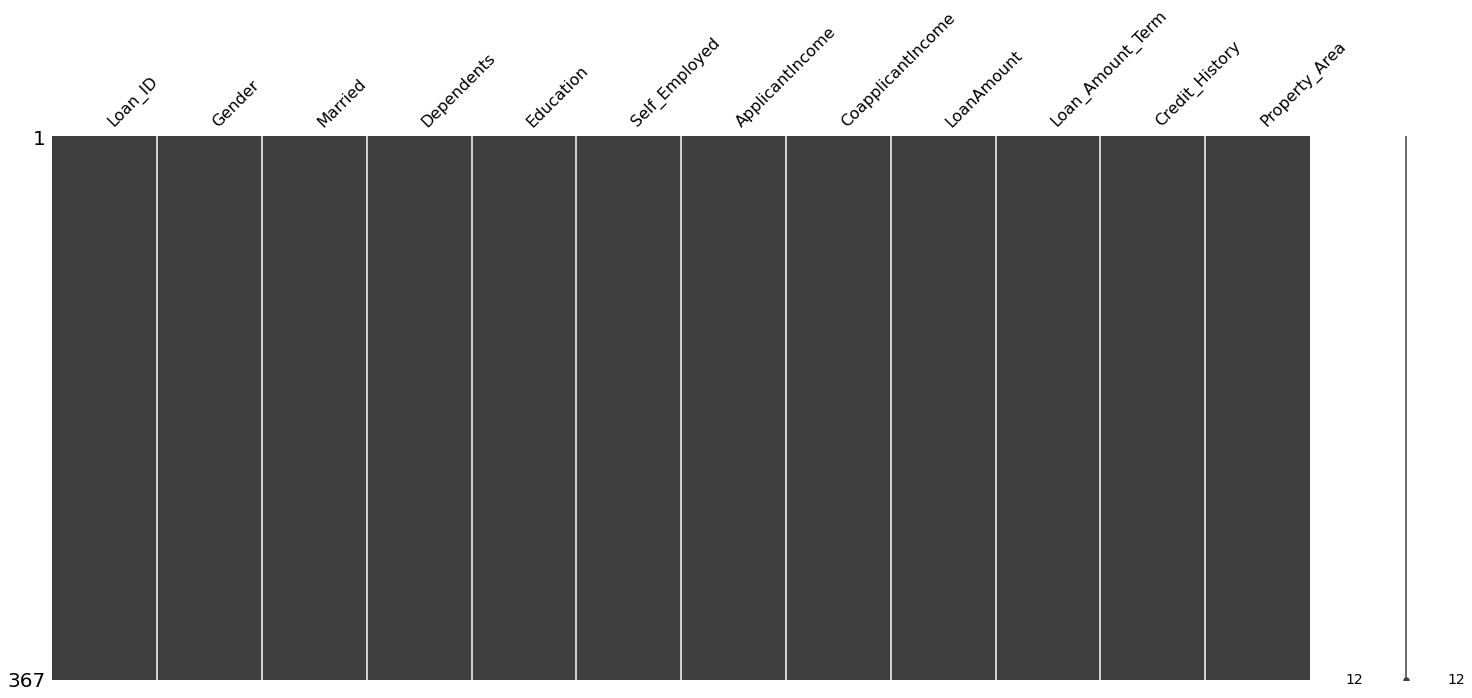

In [ ]:
msno.matrix(df_val)

## 2.2. Mengubah nilai kategorikal menjadi numerikal
Nilai-nilai pada fungsi kategorikal sebaiknya diubah menjadi numerik agar model machine learning berkinerja optimal.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_train.Loan_Status = df_train.Loan_Status.replace({"Y": 1, "N" : 0})

features = ['Gender', 'Married', 'Self_Employed', 'Property_Area','Education', 'Dependents']
encoder = LabelEncoder()
for col in features:
    df_train[col] = encoder.fit_transform(df_train[col])
    df_val[col] = encoder.fit_transform(df_val[col])

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
df_val.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


## 2.3. Potong fitur Loan_ID

In [ ]:
df_train.drop(columns='Loan_ID')
df_val.drop(columns='Loan_ID')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


## 2.4. Periksa data Jenis Kelamin / Gender

Female = 0

Male = 1

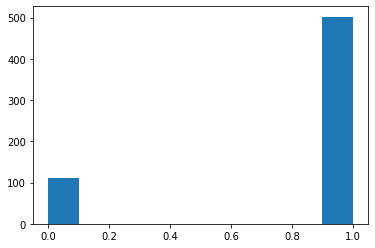

In [ ]:
plt.hist(df_train.Gender)
plt.show()

In [ ]:
df_train.Gender.value_counts()

1    502
0    112
Name: Gender, dtype: int64

## 2.5. Periksa data Status Pernikahan / Married
No = 0

Yes = 1

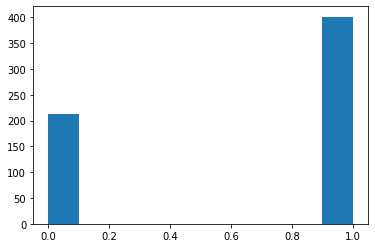

In [ ]:
plt.hist(df_train.Married)
plt.show()

In [ ]:
df_train.Married.value_counts()

1    401
0    213
Name: Married, dtype: int64

## 2.6. Periksa data Jumlah Tanggungan / Dependents
Nilai: 0, 1, 2, 3

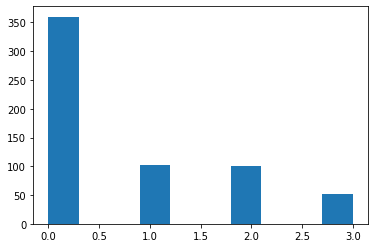

In [ ]:
plt.hist(df_train.Dependents)
plt.show()

In [ ]:
df_train.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

## 2.7. Periksa data Pendidikan Terakhir / Education
Graduate = 0

Not Graduate = 1

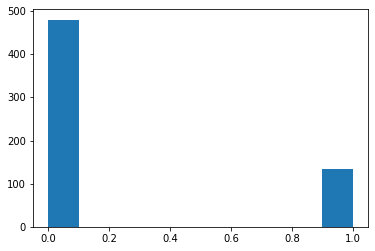

In [ ]:
plt.hist(df_train.Education)
plt.show()

In [ ]:
df_train.Education.value_counts()

0    480
1    134
Name: Education, dtype: int64

## 2.8. Periksa data Status Pekerjaan / Self_Employed
No = 0

Yes = 1

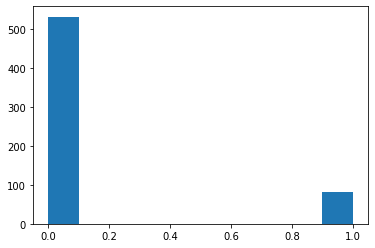

In [ ]:
plt.hist(df_train.Self_Employed)
plt.show()

In [ ]:
df_train.Self_Employed.value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

## 2.9. Periksa data Pendapatan Applicant / ApplicantIncome

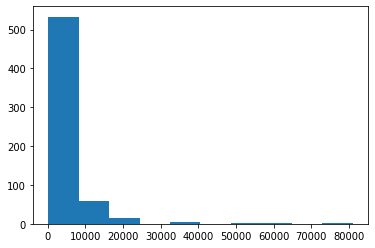

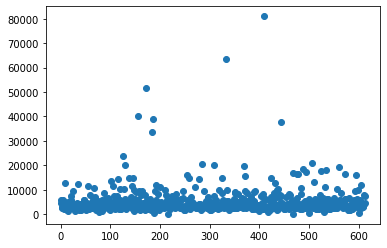

In [ ]:
plt.hist(df_train.ApplicantIncome)
plt.show()

plt.scatter(range(0,len(df_train.index),1), df_train.ApplicantIncome)
plt.show()

In [ ]:
df_train = df_train[df_train.ApplicantIncome <= 30000]
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


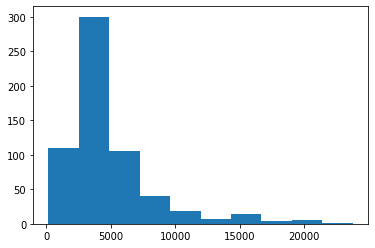

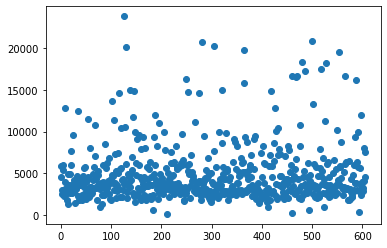

In [ ]:
plt.hist(df_train.ApplicantIncome)
plt.show()

plt.scatter(range(0,len(df_train.index),1), df_train.ApplicantIncome)
plt.show()

## 2.10. Periksa data Pendapatan Pasangan Applicant / CoApplicantIncome

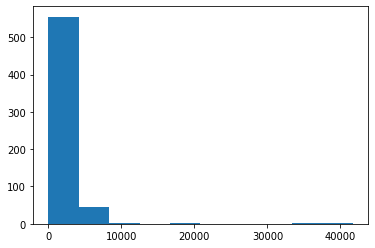

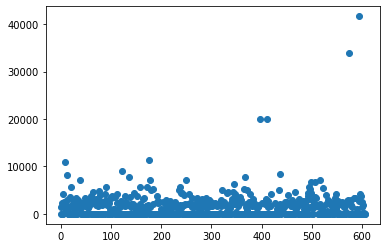

In [ ]:
plt.hist(df_train.CoapplicantIncome)
plt.show()

plt.scatter(range(0,len(df_train.index),1), df_train.CoapplicantIncome)
plt.show()

In [ ]:
df_train = df_train[df_train.CoapplicantIncome <= 15000]
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


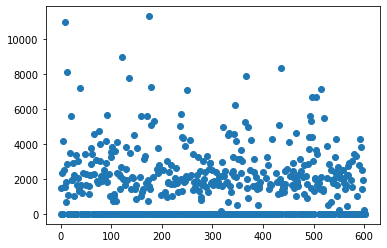

In [ ]:
plt.scatter(range(0,len(df_train.index),1), df_train.CoapplicantIncome)
plt.show()

## 2.11. Periksa data Jumlah Pinjaman / LoanAmount

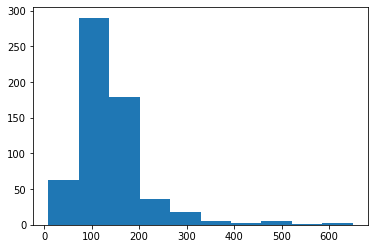

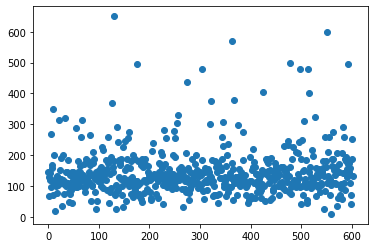

In [ ]:
plt.hist(df_train.LoanAmount)
plt.show()

plt.scatter(range(0,len(df_train.index),1), df_train.LoanAmount)
plt.show()

## 2.12. Periksa data Tenor Pinjaman / LoanAmountTerm

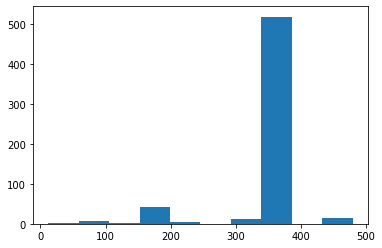

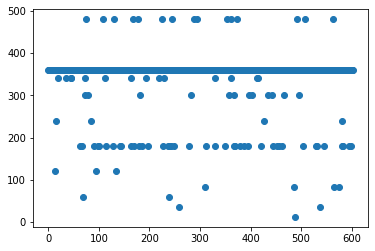

In [ ]:
plt.hist(df_train.Loan_Amount_Term)
plt.show()

plt.scatter(range(0,len(df_train.index),1), df_train.Loan_Amount_Term)
plt.show()

## 2.13. Periksa data Credit History / CreditHistory

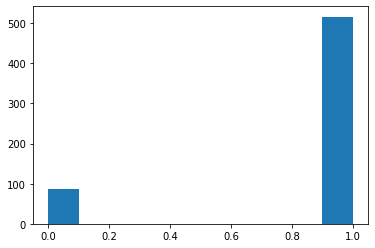

In [ ]:
plt.hist(df_train.Credit_History)
plt.show()

## 2.14. Periksa data Area Properti / Property Area
Rural = 0

Semi Urban = 1

Urban = 2

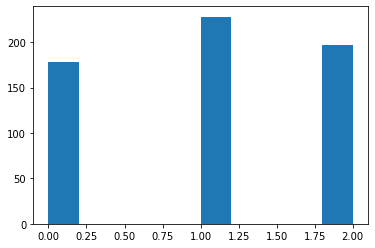

In [ ]:
plt.hist(df_train.Property_Area)
plt.show()

## 2.15. Buat diagram heatmap
Diagram heatmap berguna untuk memvisualisasikan korelasi antar-fitur sehingga kita dengan mudah dapat melihat keterkaitan-keterkaitan antara fitur mana yang kuat dan cukup signifikan.
Diagram heatmap ini juga berguna untuk melakukan pemeriksaan apakah semua fitur sudah kita ubah nilainya menjadi numerikal, karena fitur kategorikal tidak akan dipetakan di diagram ini.

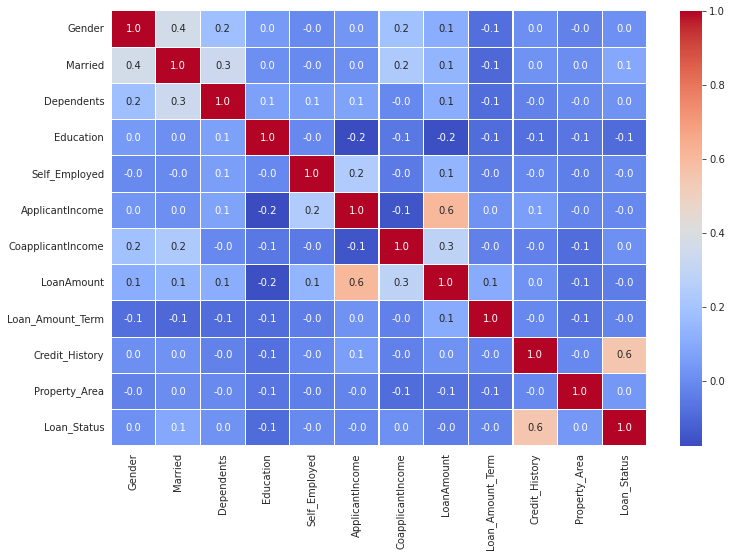

In [ ]:
import seaborn as sns

sns.set_style('dark')
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

# 3. Memisahkan data training dan validasi. 

In [ ]:
import sklearn.model_selection as ms

features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = df_train[features]
y = df_train.Loan_Status

X_train, X_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.2, random_state = 0)

# 4. Membuat model logistic regression.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = "lbfgs"))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver = "lbfgs"))])

pipe.score(X_val, y_val) 

#model = lm.LogisticRegression(solver="lbfgs")
#model.fit(X_train, y_train)

0.8347107438016529

# 5. Melakukan validasi.

In [ ]:
y_pred = pipe.predict(X_val)
print(y_pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1]


In [ ]:
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.value_counts()

1    104
0     17
dtype: int64

# 6. Mengukur performa model Logistic Regression

## 6.1. Mean Squared Error (MSE)

Metrik pengukuran performa pertama yang dipakai adalah Mean Squared Error (MSE). Metrik ini mengkuadratkan perbedaan nilai antara prediksi dan aktual, lalu mengambil nilai akhir rata-ratanya.

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse', 'accuracy', 'precision', 'sensitivity', 'roc_auc'], 
                      columns=['Logistic Regression'])

In [ ]:
from sklearn.metrics import mean_squared_error

models.loc['train_mse','Logistic Regression'] = mean_squared_error(y_pred = pipe.predict(X_train), y_true=y_train)

In [ ]:
models.loc['test_mse','Logistic Regression'] = mean_squared_error(y_pred = pipe.predict(X_val), y_true=y_val)

In [ ]:
models

,Logistic Regression
train_mse,0.188797
test_mse,0.165289
accuracy,NaN
precision,NaN
sensitivity,NaN
roc_auc,NaN


## 6.2. Confusion Matrix

Matrix ini memetakan hasil prediksi ke dalam beberapa kategori, antara lain:
1. True Positive  - nilai prediksi 1, nilai aktual 1.
2. True Negative  - nilai prediksi 0, nilai aktual 0.
3. False Positive - nilai prediksi 1, nilai aktual 0
4. False Negative - nilai prediksi 0, nilai aktual 1

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)

[[16 19]
 [ 1 85]]


### 6.2.1 Akurasi

Akurasi diukur dengan rumus = (TP + TN)/(TP + TN + FP + FN)

In [ ]:
score = pipe.score(X_val, y_val)
print(score)

0.8347107438016529


In [ ]:
models.loc['accuracy','Logistic Regression'] = score

### 6.2.2 Presisi

Presisi diukur dengan rumus = TP / (TP + FP)

In [ ]:
import sklearn.metrics as met

precision = met.precision_score(y_val, y_pred)
print(precision)

0.8173076923076923


In [ ]:
models.loc['precision','Logistic Regression'] = precision

### 6.2.3 Sensitivitas

Sensitivitas diukur dengan rumus = TP / (TP + FN)

In [ ]:
sensitivity = met.recall_score(y_val, y_pred)
print(sensitivity)

0.9883720930232558


In [ ]:
models.loc['sensitivity','Logistic Regression'] = sensitivity

### 6.2.4 Area dibawah Kurva

Area dibawah kurva (area under the curve) atau yang disebut juga dengan auc dipakai sebagai ukuran untuk menilai baik atau buruknya suatu model. AUC mendekati 1 berarti bahwa model tersebut memiliki performa baik, sedangkan AUC mendekati 0.5 menandakan bahwa model memiliki performa buruk.

In [ ]:
auc_val = met.roc_auc_score(y_val, y_pred)
print(auc_val)

0.7227574750830565


In [ ]:
models.loc['roc_auc','Logistic Regression'] = auc_val

In [ ]:
models

,Logistic Regression
train_mse,0.188797
test_mse,0.165289
accuracy,0.834711
precision,0.817308
sensitivity,0.988372
roc_auc,0.722757


### 6.2.5. Kurva ROC

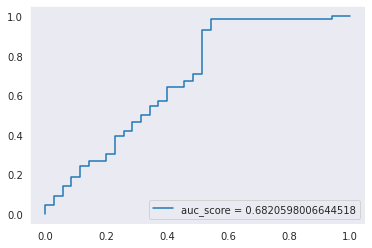

In [ ]:
import matplotlib.pyplot as plt
y_pred_proba = pipe.predict_proba(X_val)[::, 1]
fp, tp, _ = met.roc_curve(y_val, y_pred_proba)
auc = met.roc_auc_score(y_val, y_pred_proba)
plt.plot(fp, tp, label = "auc_score = {}".format(auc))
plt.legend(loc=4)
plt.show()

# 7. Simpan model Logistic Regression

In [ ]:
import pickle as pkl

pipe.fit(X_train, y_train)

# Menyimpan model ke media penyimpanan

filename = 'logistic_regression_model.sav'
pkl.dump(pipe, open(filename, 'wb'))
pipe.score(X_train, y_train)

0.8112033195020747

In [ ]:
# Membuka model dari media penyimpanan

loaded_pipe = pkl.load(open(filename, 'rb'))
result = loaded_pipe.score(X_train, y_train)
print(result)

0.8112033195020747


# 8. Implementasi Algoritma Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=12, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)       
models.loc['test_mse','Random Forest'] = mean_squared_error(y_pred=RF.predict(X_val), y_true=y_val)        

In [ ]:
models

,Logistic Regression,Random Forest
train_mse,0.188797,0.029990
test_mse,0.165289,0.153723
accuracy,0.834711,NaN
precision,0.817308,NaN
sensitivity,0.988372,NaN
roc_auc,0.722757,NaN


## 8.1. Prediksi dari algoritma Random Forest

In [ ]:
y_pred = RF.predict(X_val)
y_pred

array([0.66173399, 0.99190416, 0.68748457, 0.83708623, 0.79094594,
       0.38505128, 0.65139184, 0.36      , 0.77166209, 0.66104301,
       0.97894737, 0.66322888, 0.95481781, 0.57694017, 0.55294997,
       0.87123656, 0.84537818, 0.85612384, 0.44      , 0.84650892,
       0.74136922, 0.85931034, 0.02      , 0.67952941, 0.95612384,
       0.32716667, 0.85371432, 0.81988038, 0.69407964, 0.92388648,
       0.72994431, 0.99485725, 0.69196957, 0.        , 0.82699134,
       0.08      , 0.8268652 , 0.93612384, 0.77562032, 0.        ,
       0.93030475, 0.44      , 0.48791111, 0.        , 0.93887794,
       0.7063986 , 0.68364706, 0.47973193, 0.97428875, 0.68305597,
       0.91210294, 0.64760578, 0.61466667, 0.87562032, 0.91612384,
       0.        , 0.77303419, 0.70796019, 0.96402526, 0.43333333,
       0.39000992, 0.        , 0.02      , 0.89600577, 0.52221795,
       0.48274129, 0.92769603, 0.7139104 , 0.75587288, 0.99612384,
       0.97340891, 0.94883217, 0.97340891, 0.96499484, 0.49132

## 8.2. Ubah nilai score Random Forest ke nilai binomial

In [ ]:
y_pred_new = []
for val in y_pred:
    if (val > 0.5): val = 1 
    else: val = 0
    y_pred_new.append(val)

print(y_pred_new)

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]


# 9. Mengukur performa model Random Forest

## 9.1. Mean Squared Error (MSE)

In [ ]:
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)       
models.loc['test_mse','Random Forest'] = mean_squared_error(y_pred=RF.predict(X_val), y_true=y_val)

models

,Logistic Regression,Random Forest
train_mse,0.188797,0.029990
test_mse,0.165289,0.153723
accuracy,0.834711,NaN
precision,0.817308,NaN
sensitivity,0.988372,NaN
roc_auc,0.722757,NaN


## 9.2. Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_val, y_pred_new)
print(cf_matrix)

[[19 16]
 [12 74]]


### 9.2.1. Akurasi

In [ ]:
score = met.accuracy_score(y_val, y_pred_new)
print(score)

0.768595041322314


In [ ]:
models.loc['accuracy','Random Forest'] = score

### 9.2.2. Presisi

In [ ]:
precision = met.precision_score(y_val, y_pred_new)
print(precision)

0.8222222222222222


In [ ]:
models.loc['precision','Random Forest'] = precision

### 9.2.3. Sensitivitas

In [ ]:
sensitivity = met.recall_score(y_val, y_pred_new)
print(sensitivity)

0.8604651162790697


In [ ]:
models.loc['sensitivity','Random Forest'] = sensitivity

### 9.2.4. Area dibawah kurva (AUC)

In [ ]:
auc_val = met.roc_auc_score(y_val, y_pred_new)
print(auc_val)

0.7016611295681063


In [ ]:
models.loc['roc_auc','Random Forest'] = auc_val

In [ ]:
models

,Logistic Regression,Random Forest
train_mse,0.188797,0.029990
test_mse,0.165289,0.153723
accuracy,0.834711,0.768595
precision,0.817308,0.822222
sensitivity,0.988372,0.860465
roc_auc,0.722757,0.701661


### 9.2.5. Kurva ROC

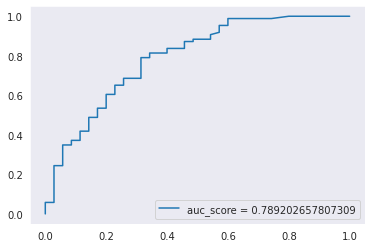

In [ ]:
import matplotlib.pyplot as plt
y_pred_proba = RF.predict(X_val)
fp, tp, _ = met.roc_curve(y_val, y_pred_proba)
auc = met.roc_auc_score(y_val, y_pred_proba)
plt.plot(fp, tp, label = "auc_score = {}".format(auc))
plt.legend(loc=4)
plt.show()

# 10. Simpan model Random Forest

In [ ]:
RF.fit(X_train, y_train)

# Menyimpan model ke media penyimpanan

filename = 'random_forest_model.sav'
pkl.dump(RF, open(filename, 'wb'))
RF.score(X_train, y_train)

0.8610957568748726

In [ ]:
# Membuka model dari media penyimpanan

loaded_rf = pkl.load(open(filename, 'rb'))
result = loaded_rf.score(X_train, y_train)
print(result)

0.8610957568748726


# 11. Implementasi Algoritma Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
models.loc['test_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_val), y_true=y_val)

In [ ]:
models

,Logistic Regression,Random Forest,Boosting
train_mse,0.188797,0.029990,0.13790
test_mse,0.165289,0.153723,0.14803
accuracy,0.834711,0.768595,NaN
precision,0.817308,0.822222,NaN
sensitivity,0.988372,0.860465,NaN
roc_auc,0.722757,0.701661,NaN


## 11.1. Prediksi algoritma boosting

In [ ]:
y_pred_boost = boosting.predict(X_val)
y_pred_boost

array([0.65909091, 0.8226601 , 0.74766355, 0.82320442, 0.69285714,
       0.65909091, 0.74766355, 0.14285714, 0.71681416, 0.71134021,
       0.8372093 , 0.8226601 , 0.82394366, 0.65492958, 0.70722433,
       0.82394366, 0.71681416, 0.78244275, 0.33333333, 0.81617647,
       0.68141593, 0.82394366, 0.        , 0.82320442, 0.77468354,
       0.68518519, 0.71134021, 0.71134021, 0.67832168, 0.7472119 ,
       0.65909091, 0.82394366, 0.68141593, 0.        , 0.71883289,
       0.04347826, 0.82320442, 0.80737705, 0.71830986, 0.        ,
       0.71883289, 0.81222707, 0.8226601 , 0.        , 0.7472119 ,
       0.77567568, 0.76847291, 0.77567568, 0.82631579, 0.78571429,
       0.82089552, 0.71134021, 0.82638889, 0.74766355, 0.784     ,
       0.        , 0.81617647, 0.7242268 , 0.82394366, 0.69491525,
       0.69285714, 0.        , 0.        , 0.81617647, 0.64335664,
       0.6626506 , 0.82320442, 0.81222707, 0.71830986, 0.80737705,
       0.82631579, 0.80808081, 0.82631579, 0.81617647, 0.69285

## 11.2. Ubah hasil prediksi ke nilai binomial

In [ ]:
y_pred_boost_new = []
for val in y_pred_boost:
    if (val > 0.5): val = 1 
    else: val = 0
    y_pred_boost_new.append(val)

print(y_pred_boost_new)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]


# 12. Mengukur performa model Algoritma Boosting

## 12.1. Mean Squared Error (MSE)

In [ ]:
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)
models.loc['test_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_val), y_true=y_val)

In [ ]:
models

,Logistic Regression,Random Forest,Boosting
train_mse,0.188797,0.029990,0.13790
test_mse,0.165289,0.153723,0.14803
accuracy,0.834711,0.768595,NaN
precision,0.817308,0.822222,NaN
sensitivity,0.988372,0.860465,NaN
roc_auc,0.722757,0.701661,NaN


## 12.2. Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_val, y_pred_boost_new)
print(cf_matrix)

[[16 19]
 [ 1 85]]


### 12.2.1. Akurasi

In [ ]:
score = met.accuracy_score(y_val, y_pred_boost_new)
print(score)

0.8347107438016529


In [ ]:
models.loc['accuracy','Boosting'] = score

### 12.2.2. Presisi

In [ ]:
precision = met.precision_score(y_val, y_pred_boost_new)
print(precision)

0.8173076923076923


In [ ]:
models.loc['precision','Boosting'] = precision

### 12.2.3. Sensitivitas

In [ ]:
sensitivity = met.recall_score(y_val, y_pred_boost_new)
print(sensitivity)

0.9883720930232558


In [ ]:
models.loc['sensitivity','Boosting'] = sensitivity

### 12.2.4. Area dibawah kurva (AUC)

In [ ]:
auc_val = met.roc_auc_score(y_val, y_pred_boost_new)
print(auc_val)

0.7227574750830565


In [ ]:
models.loc['roc_auc','Boosting'] = auc_val

In [ ]:
models

,Logistic Regression,Random Forest,Boosting
train_mse,0.188797,0.029990,0.137900
test_mse,0.165289,0.153723,0.148030
accuracy,0.834711,0.768595,0.834711
precision,0.817308,0.822222,0.817308
sensitivity,0.988372,0.860465,0.988372
roc_auc,0.722757,0.701661,0.722757


### 12.2.5 Kurva ROC

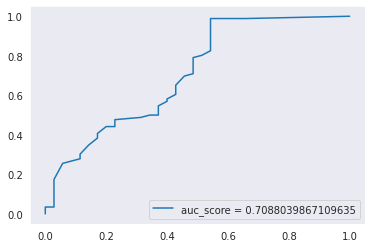

In [ ]:
import matplotlib.pyplot as plt
y_pred_proba = boosting.predict(X_val)
fp, tp, _ = met.roc_curve(y_val, y_pred_proba)
auc = met.roc_auc_score(y_val, y_pred_proba)
plt.plot(fp, tp, label = "auc_score = {}".format(auc))
plt.legend(loc=4)
plt.show()

# 13. Simpan model Algoritma Boosting

In [ ]:
boosting.fit(X_train, y_train)

# Menyimpan model ke media penyimpanan

filename = 'boosting_model.sav'
pkl.dump(boosting, open(filename, 'wb'))
boosting.score(X_train, y_train)

0.3612957413743558

In [ ]:
# Membuka model dari media penyimpanan

loaded_boost = pkl.load(open(filename, 'rb'))
result = loaded_boost.score(X_train, y_train)
print(result)

0.3612957413743558


# 14. Evaluasi model machine learning

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['Logistic Regression','Random Forest','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'Logistic Regression': pipe, 'Random Forest': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_val, y_pred=model.predict(X_val))/1e3
 
# Panggil mse
mse

,train,test
Logistic Regression,0.000189,0.000165
Random Forest,0.00003,0.000154
Boosting,0.000138,0.000148


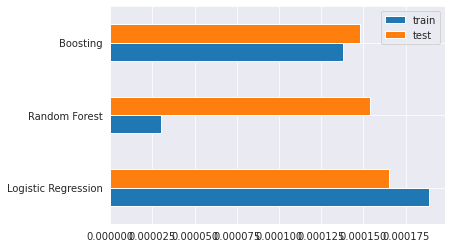

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediction = X_val.iloc[:1].copy()
pred_dict = {'y_true':y_val[:1]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediction).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediction_Logistic Regression,prediction_Random Forest,prediction_Boosting
276,1,1,0.7,0.7
